<h1 style="text-align:center;">Лабораторная работа №3</h2>

<h2 style="text-align:center;">Решение дифференциального уравнения с периодическим краевым условием модифицированным методом прогонки</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>

### Цель -решение задачи с периодическими граничными условиями
<img src="images\task1.png" alt="drawing" width="750"/>
<img src="images\task2.png" alt="drawing" width="750"/>



Рассматривается задача численного решения дифференциального уравнения:  $$y''(x) - P^2(x) y(x) = f(x), \quad x \in [0, 1],$$
с периодическими граничными условиями: $$y(0) = y(1),$$ где функции $ P^2(x) $ и $ f(x) $ — периодические с периодом 1.  
Сетка разбивается шагом $ h $, всего $ N = \frac{1}{h} $ узлов.

---

##### Разностная аппроксимация

Используется центральная разностная схема второго порядка:

$$
\frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(x_n) y_n = f(x_n),
$$

что можно привести к виду:

$$
a_n y_{n-1} - b_n y_n + c_n y_{n+1} = \varphi_n,
$$

где:
- $ a_n = \frac{1}{h^2} $,
- $ c_n = \frac{1}{h^2} $,
- $ b_n = \frac{2}{h^2} + P^2(x_n) $,
- $ \varphi_n = f(x_n) $.

---

##### Структура системы

Если бы граничные условия были обычными (например, Дирихле), система была бы **строго трёхдиагональной**. Однако при периодичности крайние значения связаны:

$$
y_0 = y_N,
$$

а значит, система становится **почти трёхдиагональной**: в первом и последнем уравнении появляется связь между краями сетки. Получается **циклически замкнутая система**, для которой стандартный метод прогонки **не подходит**.

---

##### Обычная прогонка

Стандартная трёхдиагональная прогонка решает систему вида:
$$a_n y_{n-1} - b_n y_n + c_n y_{n+1} = \varphi_n,$$
путём рекуррентного вычисления коэффициентов:
$$\alpha_{n+1} = \frac{c_n}{b_n - a_n \alpha_n}, \quad
\beta_{n+1} = \frac{\varphi_n + a_n \beta_n}{b_n - a_n \alpha_n},$$
а затем обратным ходом:
$$y_n = \alpha_n y_{n+1} + \beta_n.$$
Но она предполагает известные значения на границах, чего нет в периодическом случае.

---

##### Циклическая (периодическая) прогонка

Чтобы решить **почти трёхдиагональную** систему, используется модифицированный метод прогонки:
1. Выполняется **прямой ход прогонки**, как обычно, до последнего уравнения.
2. Последнее уравнение содержит как \( y_0 \), так и \( y_{N-1} \). Используется выражение:
   $$   y_{N-1} = \alpha_N y_0 + \beta_N   $$
   Подставляется в последнее уравнение, получаем:
   $$   y_0 = \frac{\nu}{1 - \mu},   $$
   где:
   $$
   \mu = \frac{a_{N-1} \alpha_N + c_{N-1}}{b_{N-1} - a_{N-1} \alpha_N}, \quad
   \nu = \frac{\varphi_{N-1} + a_{N-1} \beta_N}{b_{N-1} - a_{N-1} \alpha_N}
   $$

3. После нахождения \( y_0 \), остальные значения находятся из формулы:
   $$   y_n = \alpha_n y_0 + \beta_n$$

---

##### Вывод
Периодические условия приводят к системе, в которой матрица **замкнута по кругу**, и её решение требует учёта взаимосвязи крайних узлов - модифицированный метод прогонки позволяет корректно решить такую задачу.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [31]:
# Параметры задачи
h = 0.005
N = int(1 / h)
x = np.linspace(-1, 9 - h, N)

# Заданные функции
P2 = 10 + np.sin(2 * pi * x)
f = np.cos(2 * pi * x)

# Коэффициенты разностной схемы
a = np.ones(N) / h**2
c = np.ones(N) / h**2
b = 2 / h**2 + P2
phi = f

# Модифицированный метод прогонки (циклический)
alpha = np.zeros(N)
beta =  np.zeros(N)

# Прямая прогонка
alpha[1] = c[0] / b[0]
beta[1] =  phi[0] / b[0]

for i in range(1, N - 1):
    denom = b[i] - a[i] * alpha[i]
    alpha[i + 1] = c[i] / denom
    beta[i + 1] = (phi[i] + a[i] * beta[i]) / denom

# Вычисление коэффициентов для уравнения на y0
mu = (a[-1] * alpha[-1] + c[-1]) / (b[-1] - a[-1] * alpha[-1])
nu = (phi[-1] + a[-1] * beta[-1]) / (b[-1] - a[-1] * alpha[-1])

# Решение для y0
y = np.zeros(N)
y[0] = nu / (1 - mu)

# Обратная прогонка
for i in range(1, N):
    y[i] = alpha[i] * y[0] + beta[i]


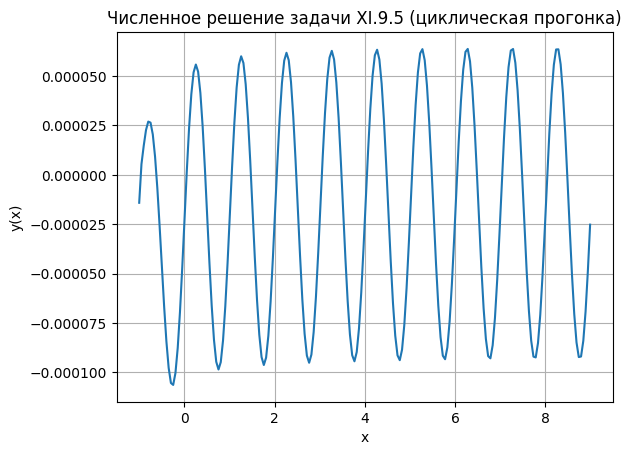

In [32]:
# Построение графика
plt.plot(x, y)
plt.title("Численное решение задачи XI.9.5 (циклическая прогонка)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.show()

Почему первое колебание съехало вниз?   
1) Хотя задача периодическая, численное решение строится с началом от $x=0$, и:    
- значение $y_0$ (в точке $x=0$) вычисляется через уравнение, полученное из прогонки;   
- из-за накопленных ошибок округления и итеративного характера решения первая пара узлов $y_0$, $y_1$ может быть чуть менее точной.   

2) Численная стабильность и "вход" в устойчивое состояние    
Модифицированная прогонка может проявлять начальный переходный процесс, пока не войдёт в устойчивый режим. После нескольких узлов решение «находит» свою истинную периодичность и начинает стабильно повторяться с периодом 1.  

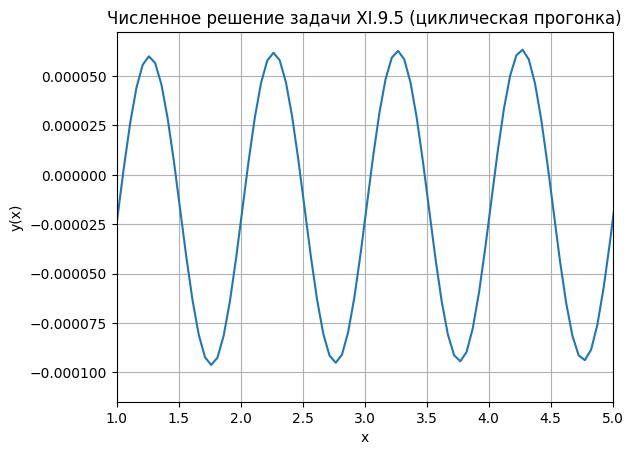

In [33]:
# Построение графика
plt.plot(x, y)
plt.xlim(1, 5)
plt.title("Численное решение задачи XI.9.5 (циклическая прогонка)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.show()